### Homework 8 ###
**1a.** Polynomial Interpolation with Equispaced Points
Using `interp_monomials(x,y)` with: $$\\f(x) = \frac{1}{1+25x^{2}} \quad  x \in [-1,1]$$

f =
  function_handle with value:
    @(x)1./[1+25*x.^2]
x =
  Columns 1 through 3
                        -1        -0.818181818181818        -0.636363636363636
  Columns 4 through 6
        -0.454545454545455        -0.272727272727273       -0.0909090909090909
  Columns 7 through 9
        0.0909090909090908         0.272727272727273         0.454545454545455
  Columns 10 through 12
         0.636363636363636         0.818181818181818                         1
y =
  Columns 1 through 3
        0.0384615384615385        0.0563839701770736        0.0898959881129272
  Columns 4 through 6
         0.162198391420911          0.34971098265896         0.828767123287671
  Columns 7 through 9
         0.828767123287672          0.34971098265896         0.162198391420911
  Columns 10 through 12
        0.0898959881129272        0.0563839701770736        0.0384615384615385
p =
  function_handle with value:
    @(s)l_p(s)+l_t{i}(s)*y(i)


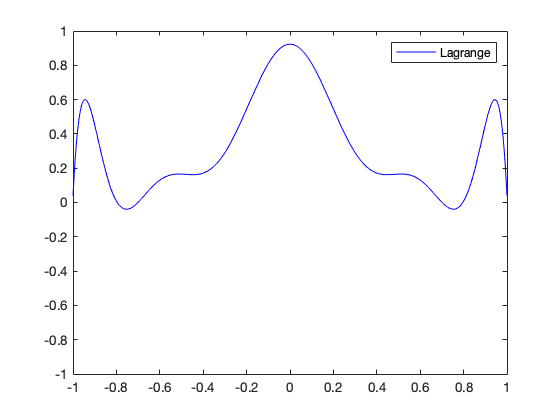

In [1]:
%plot inline
warning('off')
clc; clear; close all

a = -1; b = 1;
resolution = 11;

x = linspace(a,b,resolution+1);
x_plt = linspace(a,b,100*(resolution+1));

n = [0:length(x)-1];

f = @(x) 1./[1+25*x.^2]

x
y = f(x)

p = lagrange_poly(x,y) %using lagrange_poly for 12 nodes from homework 7

fplot(p, [-1,1],'b') %plotting lagrange poly on 'fine' grid
ylim([-1,1])
legend('Lagrange','Function','Spline')
hold on


**2a** Natural Cubic Splines
<br>Save as `spline3_coeff.m`:

```
function z = spline3_coeff(t,y)

n = length(t);

for i = 1:n-1
    h(i) = t(i+1) - t(i);
    b(i) = y(i+1) - y(i);  b(i) = b(i)/h(i);
end

u = zeros(1,n-2);
v = zeros(1,n-2);
u(1) = 2*(h(1)+h(2));
v(1) = 6*(b(2)-b(1));
for i = 3:n-1
    u(i-1) = 2*[h(i)+h(i-1)]-[h(i-1)^2/u(i-2)];
    v(i-1) = 6*[b(i)-b(i-1)]-h(i-1)*v(i-2)/u(i-2);
end

z = zeros(n,1);
for i = n-1:-1:2
    z(i) = [v(i-1)-h(i)*z(i+1)]/u(i-1);
end

end
```


**2b.** Computing the cubic spline.

z =
                         0
         0.299014858053071
          1.63345046677551
         0.207638219886641
          18.4466457629845
         -21.0790670574191
         -21.0790670574192
          18.4466457629845
         0.207638219886635
          1.63345046677551
         0.299014858053071
                         0


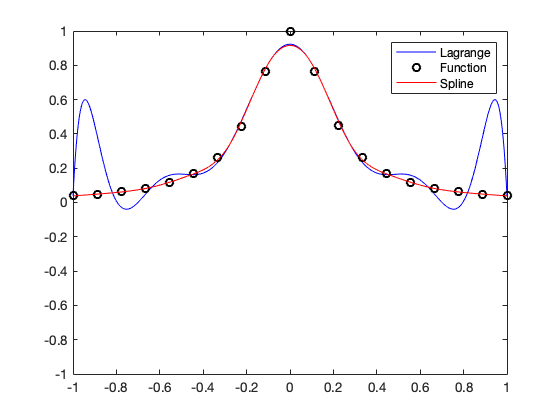

In [2]:
z = spline3_coeff(x,y)

f(1);

for i = 1:length(x_plt)
    y2(i) = eval_spine(x_plt(i),x,y,z); %using eval_spine from course-website
end


fplot(p, [-1,1],'b') %plotting lagrange poly on 'fine' grid
ylim([-1,1])
legend('Lagrange','Function','Spline')
hold on
fplot(f, [-1,1],'ko')
plot(x_plt,y2,'r')
legend('Lagrange','Function','Spline')

Using Natural Cubic Splines gives an exceptional fit to the the 'data' formed from the given function and seems to <br>behave better than the Lagrange Polynomial constructed in our previous homework, each spline evaluates in its <br>neighborhood (interval). In doing so the problem values in the function seem to be isolated from one another <br>with different splines being defined over a specific 'problem' area.

**3a.** Newton-Cotes Integration (See Attached)

In [3]:
clc, close, clear all
%a
syms x

a = 1, b = 3
f = 2*x*cos(x); I_tru = double(int(f,a,b)) %establish 'true' x for error estimation

%Used the following to double check max f''(w) on interval to estimate error using THM 1 Pg. 192 Cheney/Kincaid
    df2 = diff(diff(f));
    df3 = diff(df2);

    df3 = matlabFunction(df3);
    df2 = matlabFunction(df2);
    f = matlabFunction(f);

    fzero(df3,-1);
    fzero(df3,0);
    fzero(df3,1);

    df2(-1); df2(ans); df2(1);

a =
     1
b =
     3
I_tru =
         -3.89681152619376


**3b.** Save as `comp_trap_int.m`:

```
function sum = comp_trap_int(f,a,b,n)
deltx = b-a; deltx = deltx/n;
val = f(a)+f(b); sum = val/2;
x = min([a,b]);
for i = 1:n-1
    x = x+deltx;
    sum = sum + f(x);
end
sum = sum*deltx;
end
```

**3c.** Estimating order of error convergence.

In [11]:

p = 4; p = p + 1;
n = 2.^[2:1:p];


for i = 1:length(n)
    y(i) = comp_trap_int(f,a,b,n(i));
if i == 1
    p(i) = inf;
else
    errn = abs(y(i)-I_tru); errn_1 = abs(y(i-1)-I_tru);
    h = (b-a)/n(i);
    h_1 = (b-a)/n(i-1);
    p(i) = log10(errn/errn_1)/log10(h/h_1);
end
end



Table1 = [n',y',p'];
Table1 = array2table(Table1,'VariableNames',{'N','I','p'});
disp(Table1)

    N             I                   p        
    __    _________________    ________________
     4    -3.94388450142666                 Inf
     8    -3.90844216909231    2.01696819518937
    16    -3.89971066995094    2.00423206793308
    32     -3.8975357811095    2.00105739610596


Given Theorem 1 on pg. 192 Cheney/Kincaid 6e this is directly in line with what we should expect. Testing with variations in N the converge = O(h^2) still not just in 2^n nodes, see below.

In [13]:
p = 13; p = p + 1;
n = [2:1:p];


for i = 1:length(n)
    y(i) = comp_trap_int(f,a,b,n(i)); %using comp_trap_int to find int f for multiple n
if i == 1
    p(i) = inf; 
else
    errn = abs(y(i)-I_tru); errn_1 = abs(y(i-1)-I_tru);
    h = (b-a)/n(i);
    h_1 = (b-a)/n(i-1);
    p(i) = log10(errn/errn_1)/log10(h/h_1);
end
end



Table1 = [n',y',p'];
Table1 = array2table(Table1,'VariableNames',{'N','I','p'});
disp(Table1)

    N             I                   p        
    __    _________________    ________________
     2    -4.09426253012177                 Inf
     3    -3.98152777520925    2.08694417849856
     4    -3.94388450142666    2.04256163105887
     5    -3.92676846325987    2.02532468505835
     6    -3.91755128133245    2.01681320236306
     7    -3.91202078154395    2.01198106736853
     8    -3.90844216909231    2.00897255365858
     9    -3.90599362689715    2.00697180001545
    10    -3.90424466146016    2.00557360846533
    11    -3.90295194509778      2.004557947717
    12    -3.90196947942705    2.00379686756608
    13    -3.90120533887885    2.00321180899701
    14    -3.90059929608797     2.0027523563863


**4.a** Gauss Quadrature 
<br>(See Attached)

**4b.**
Save as `gauss_quad_three_pts.m`:

```
function sum = gauss_quad_three_pts(f,a,b)
t = [-sqrt(3/5), 0, sqrt(3/5)];
x = [(b-a).*t+(b+a)]./2;
w = [5/9, 8/9, 5/9];
f_eval = [f(x(1)), f(x(2)), f(x(3))];
f_eval = (1/2)*(b-a)*f_eval;
    sum = w*f_eval';
end
```

In [8]:
gauss_quad_three_pts(f,a,b)

ans =
         -3.89624898182788


This does indeed give me the same answer to 16 digits of precision as my hand calculated answer. It differs from the true int(f) however. I attribute this to using a trigonemtric function in lieu of a polynomial of at most n-1, which Gauss Quadrature is proven to be 'exact' for. However, cos can be very well approximated by a polynomial which is why the answer is still close in some sense.

**3c.** Gauss on sub-intervals
Save as `comp_gauss_quad.m`:

```
function sum = comp_gauss_quad(f,a,b,n)
sum = 0;
deltx = b-a; deltx = deltx/n;
a1 = min([a,b]);
for i = 1:n
    b1 = a1 + deltx;
    sum = sum + gauss_quad_three_pts(f,a1,b1);
    a1 = b1;
end
end
```


**3d.** Calculating Error

In [15]:
clear y
syms x
a = 1; b = 3;

f = 2*x*cos(x); I_tru = double(int(f,a,b)); %finding x 'true' for error estimation
f = matlabFunction(f);

p = 4; p = p + 1;
n = 2.^[2:1:p];


for i = 1:length(n)
    y(i) = comp_gauss_quad(f,a,b,n(i)); %using comp_gauss_quad to find f for multiple n
if i == 1
    p(i) = inf;
else
    errn = abs(y(i)-I_tru); errn_1 = abs(y(i-1)-I_tru);
    h = (b-a)/n(i);
    h_1 = (b-a)/n(i-1);
    p(i) = log10(errn/errn_1)/log10(h/h_1);
end
end



Table1 = [n',y',p'];
Table1 = array2table(Table1,'VariableNames',{'N','I','p'});
disp(Table1)

    N             I                   p        
    __    _________________    ________________
     4        -3.8968114127                 Inf
     8     -3.8968115244365    6.01314435068744
    16    -3.89681152616637     6.0032697360509
    32    -3.89681152619333    5.99981291641796


The error for Gauss quadrature over 3 points per interval x_i - x_i+1 is O(h^6) which is considerable conisdering how simple the computation is (once you know the weights and nodes). Nice.